¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.sample(2)) 

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Solo existen dos planes de teléfono disponibles para los usuarios y dependiendo del que se escoja tendrá las caracterísitcas en cantidad correspondientes a éste. Con respecto a la información obtenida, al parecer no hay valores ausentes y el tipo de valor concuerda según la columna descrita.  

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
#no es necesario ya que no se presentan errores en los datos

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# La columna mb_per_month_included tiene valores muy altos que puden ser convertidos de megabytes a gigabytes con la siguiente conversion
def mb_to_gb(megabytes):
    return megabytes / 1024

# Se aplica la conversion a la columna 'mb_per_month_included' para pasar de mb a gb
# Es importante recalcar que esta division redondeara el resultado
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'].apply(lambda x: mb_to_gb(x))

print(df_plans.sample(2)) 

   messages_included  mb_per_month_included  minutes_included  \
1               1000                   30.0              3000   
0                 50                   15.0               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(5))

     user_id first_name  last_name  age  \
315     1315       Mora  Schroeder   45   
107     1107       Lane       Cash   61   
366     1366        Rod       Huff   62   
91      1091     Taylor     Oliver   38   
495     1495      Fidel     Sharpe   67   

                                          city    reg_date      plan  \
315                       Raleigh-Cary, NC MSA  2018-04-26      surf   
107  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-15  ultimate   
366                   Cincinnati, OH-KY-IN MSA  2018-07-30      surf   
91    Riverside-San Bernardino-Ontario, CA MSA  2018-05-04  ultimate   
495  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-09-04      surf   

     churn_date  
315  2018-10-03  
107         NaN  
366         NaN  
91          NaN  
495         NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al parecer en la columna churn_date existen solamente 34 de los 500 datos de entradas que no son nulos, por lo tanto hay que analizarla y corregirla. De acuerdo con la información previa del proyecto, se sabe que churn_date es la fecha en la que el usuario dejó de usar el servicio. Es por eso que si este valor es nulo, significa que la tarifa se estaba usando cuando fue extraída esta base de datos. Esto quiere decir que de los 500 usuarios, 466 siguen ocupando su plan teléfonico por lo que la fecha estipulada será una establecida que caracterizara esta situación del usuario. Por si acaso se verificará a continuación si hay usuarios duplicados ya que solo pueden estar en uno de los dos planes telefónicos disponibles. Adicional, con el fin de complementar el análisis, podríamos decir de los registros que no tienen valores en la variable churn_date son aquellos que estan actualizados y que no han culimnado los planes de los usuarios que los registraron.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# El formato que tiene churn_date es aaaa-mm-dd en las filas donde si tiene esta informacion correcta
# La intencion es llenar los valores nulos con fecha 0000-00-00 para que este en el mismo formato 
df_users.fillna(value=0, inplace=True)
print('La cantidad de valores nulos es: ', df_users['churn_date'].isna().sum(), '\n')
df_users.info()
print('\n',df_users.sample(5), '\n')

# Verifiquemos si hay usuarios repetidos ya que solo pueden estan en uno de los dos planes - Resultado no hay usuarios duplicados
df_users_dup = df_users[df_users['user_id'].duplicated()]
cant_users_dup = len(df_users_dup)
print("Cantidad de usuarios duplicados:", cant_users_dup)

La cantidad de valores nulos es:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

      user_id first_name last_name  age  \
219     1219      Gavin    Keller   51   
107     1107       Lane      Cash   61   
242     1242   Lashunda     Johns   37   
115     1115    Yevette      Yang   21   
260     1260       Alia   Aguilar   36   

                                          city    reg_date      plan  \
219            Detroit-Warren-Dearborn, MI MSA  2018-05-14      surf   
107  New

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Se convierten las columnas 'reg_date' y 'churn_date' de tipo objeto a fecha
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors='coerce', format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce', format='%Y-%m-%d') # Los 0 los convierte a NaT Not a Time

# Para fechas no establecidas originalmente se define fecha_epoch
# Define fecha_epoch (1 de enero de 1970) como un marcador especial y reemplaza NaT por esta fecha
fecha_epoch = pd.Timestamp('1970-01-01')
df_users['churn_date'].fillna(fecha_epoch, inplace=True)

df_users.info()
print('\n', df_users.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

      user_id first_name last_name  age  \
325     1325     Cleora     Lyons   43   
276     1276     Karmen    Carney   20   
216     1216      Reita    Atkins   29   
466     1466   Alphonse    Harmon   56   
175     1175     Shiloh  Stafford   25   

                                          city   reg_date  plan churn_date  
325        Dal

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena conclusión, pero a manera de complementar el análisis qué podríamos decir de los registros que no tienen valores en la variable churn_date?
</div>

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sample(5))

              id  user_id   call_date  duration
12619    1055_26     1055  2018-07-27      0.00
87505   1321_141     1321  2018-09-02      0.00
90173    1327_98     1327  2018-11-19      9.34
102137  1362_903     1362  2018-12-21      0.00
75010   1264_351     1264  2018-12-25     12.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De acuerdo con la información presentada, no es necesario hacer algún ajuste ya que los datos están correctos. Lo único que se podría mejorar es pasar la columna call_date a tipo datetime en vez de que permanezca como objeto. Sobre aquellos usuarios que en sus llamadas tiene duración 0 es porque por el momento no ha ocupado este servicio.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
#no es necesario ya que no se presentan errores en los datos

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Se cambia la columna 'call_date' de tipo objeto a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce')
df_calls.info()
print('\n', df_calls.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

               id  user_id  call_date  duration
9363    1042_292     1042 2018-08-13     12.97
125036  1440_552     1440 2018-08-23      0.00
105617   1373_97     1373 2018-12-05      6.49
42605   1156_210     1156 2018-04-26      3.47
101343   1362_82     1362 2018-03-25      9.64


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sample(5))

             id  user_id message_date
21157  1132_379     1132   2018-11-28
57290  1362_368     1362   2018-12-03
36409   1242_81     1242   2018-11-12
11451  1077_722     1077   2018-12-11
19861  1126_751     1126   2018-06-07


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De acuerdo con la información presentada, no es necesario hacer algún ajuste ya que los datos están correctos. Lo único que se podría mejorar es pasar la columna message_date a tipo datetime en vez de que permanezca como objeto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
#no es necesario ya que no se presentan errores en los datos

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# Se cambia la columna 'message_date' de tipo objeto a datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce')
df_messages.info()
print('\n', df_messages.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

               id  user_id message_date
52604   1336_612     1336   2018-07-04
21672  1132_1118     1132   2018-08-01
17620   1114_668     1114   2018-10-01
35315    1227_18     1227   2018-12-30
72464    1470_92     1470   2018-05-23


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(5))

             id  user_id session_date  mb_used
3612    1022_23     1022   2018-06-20   640.16
31951   1145_87     1145   2018-08-29   117.75
2137   1010_319     1010   2018-04-30   269.25
94385   1440_23     1440   2018-10-06   233.89
14644  1066_541     1066   2018-11-05   395.34


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De acuerdo con la información presentada, no es necesario hacer algún ajuste ya que los datos están correctos. Lo único que se podría mejorar es pasar la columna session_date a tipo datetime en vez de que permanezca como objeto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# La columna mb_used se convierte a gb por calculos posteriores
def mb_to_gb(megabytes):
    return megabytes / 1024

# Se aplica la conversion a la columna 'mb_used' para pasar de mb a gb
# Es importante recalcar que esta division redondeara el resultado
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: mb_to_gb(x))

print(df_internet.sample(5))

             id  user_id session_date   mb_used
40185  1181_357     1181   2018-05-13  0.000000
64441  1295_471     1295   2018-12-13  0.082236
9967   1050_389     1050   2018-04-18  0.733398
40236  1181_425     1181   2018-05-08  0.000000
65879   1305_48     1305   2018-12-15  0.261543


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# Se cambia la columna 'session_date' de tipo objeto a datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')
df_internet.info()
print('\n', df_internet.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

              id  user_id session_date   mb_used
31334   1144_29     1144   2018-07-02  0.696270
57366  1258_468     1258   2018-07-25  0.539912
73572  1346_153     1346   2018-12-13  0.000000
80086  1374_162     1374   2018-07-02  0.254502
8488   1044_127     1044   2018-09-16  0.596719


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)
df_plans.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_mes = df_calls.groupby([df_calls['user_id'], df_calls['call_date'].dt.month])['user_id'].count() #de la fecha completa importa el mes solamente
llamadas_por_mes = llamadas_por_mes.reset_index(name='numero_de_llamadas')
llamadas_por_mes = llamadas_por_mes.rename(columns={'call_date': 'month'})
print(llamadas_por_mes)


#pivot_calls = df_calls.pivot_table(index=['user_id', 'call_date'],
#                            values=['duration'],
#                            aggfunc=['sum','count']).reset_index()
#print(pivot_calls)

      user_id  month  numero_de_llamadas
0        1000     12                  16
1        1001      8                  27
2        1001      9                  49
3        1001     10                  65
4        1001     11                  64
...       ...    ...                 ...
2253     1498     12                  39
2254     1499      9                  41
2255     1499     10                  53
2256     1499     11                  45
2257     1499     12                  65

[2258 rows x 3 columns]


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_por_mes = df_calls.groupby([df_calls['user_id'], df_calls['call_date'].dt.month])['duration'].sum()
minutos_por_mes = minutos_por_mes.reset_index(name='minutos_utilizados')
minutos_por_mes = minutos_por_mes.rename(columns={'call_date': 'month'})
print(minutos_por_mes)

      user_id  month  minutos_utilizados
0        1000     12              116.83
1        1001      8              171.14
2        1001      9              297.69
3        1001     10              374.11
4        1001     11              404.59
...       ...    ...                 ...
2253     1498     12              324.77
2254     1499      9              330.37
2255     1499     10              363.28
2256     1499     11              288.56
2257     1499     12              468.10

[2258 rows x 3 columns]


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_por_mes = df_messages.groupby([df_messages['user_id'], df_messages['message_date'].dt.month])['user_id'].count() #de la fecha completa importa el mes solamente
mensajes_por_mes = mensajes_por_mes.reset_index(name='numero_de_mensajes')
mensajes_por_mes = mensajes_por_mes.rename(columns={'message_date': 'month'})
print(mensajes_por_mes)

      user_id  month  numero_de_mensajes
0        1000     12                  11
1        1001      8                  30
2        1001      9                  44
3        1001     10                  53
4        1001     11                  36
...       ...    ...                 ...
1801     1496      9                  21
1802     1496     10                  18
1803     1496     11                  13
1804     1496     12                  11
1805     1497     12                  50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
volumen_por_mes = df_internet.groupby([df_internet['user_id'], df_internet['session_date'].dt.month])['mb_used'].sum()
volumen_por_mes = volumen_por_mes.reset_index(name='volumen_de_internet')
volumen_por_mes = volumen_por_mes.rename(columns={'session_date': 'month'})
print(volumen_por_mes)

      user_id  month  volumen_de_internet
0        1000     12             1.856904
1        1001      8             6.756982
2        1001      9            13.002754
3        1001     10            21.807119
4        1001     11            18.070605
...       ...    ...                  ...
2272     1498     12            22.595400
2273     1499      9            12.680430
2274     1499     10            19.035576
2275     1499     11            16.419756
2276     1499     12            21.542197

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Para eso fue necesario cambiar el titulo de las fechas donde solo nos importaba el mes a month
merged_data = pd.merge(llamadas_por_mes, minutos_por_mes, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, mensajes_por_mes, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, volumen_por_mes, on=['user_id', 'month'], how='outer')
print(merged_data)

# Si hay valores NaN puede ser porque los usuarios no hicieron llamadas o mandaron mensajes ese mes 

      user_id  month  numero_de_llamadas  minutos_utilizados  \
0        1000     12                16.0              116.83   
1        1001      8                27.0              171.14   
2        1001      9                49.0              297.69   
3        1001     10                65.0              374.11   
4        1001     11                64.0              404.59   
...       ...    ...                 ...                 ...   
2288     1349     12                 NaN                 NaN   
2289     1361      5                 NaN                 NaN   
2290     1482     10                 NaN                 NaN   
2291     1108     12                 NaN                 NaN   
2292     1311      6                 NaN                 NaN   

      numero_de_mensajes  volumen_de_internet  
0                   11.0             1.856904  
1                   30.0             6.756982  
2                   44.0            13.002754  
3                   53.0            21.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [29]:
# Añade la información de la tarifa
df_plans = df_plans.rename(columns={'plan_name': 'plan'})

# Se funcionan usuarios con planes y se agrupan los usuarios por el plan que han elegido y contar cuántos usuarios hay en cada plan
fusion = pd.merge(df_users, df_plans, on='plan', how='left')
users_per_plan = fusion.groupby('plan')['user_id'].count()
print(users_per_plan, '\n')

# Se obtiene un dataframe para fusionarlo con merge_data anterior
users_plan_df = fusion[['user_id', 'plan']]
merged_data = pd.merge(merged_data, users_plan_df, on='user_id', how='left')
print(merged_data)
merged_data.info()

plan
surf        339
ultimate    161
Name: user_id, dtype: int64 

      user_id  month  numero_de_llamadas  minutos_utilizados  \
0        1000     12                16.0              116.83   
1        1001      8                27.0              171.14   
2        1001      9                49.0              297.69   
3        1001     10                65.0              374.11   
4        1001     11                64.0              404.59   
...       ...    ...                 ...                 ...   
2288     1349     12                 NaN                 NaN   
2289     1361      5                 NaN                 NaN   
2290     1482     10                 NaN                 NaN   
2291     1108     12                 NaN                 NaN   
2292     1311      6                 NaN                 NaN   

      numero_de_mensajes  volumen_de_internet      plan  
0                   11.0             1.856904  ultimate  
1                   30.0             6.756982   

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
# Calcula el exceso de llamadas, mensajes y datos para cada usuario

# Se obtiene de cada plan por separado sus valores
# Detalles del plan 'Surf'
surf_messages_included = df_plans.loc[0, 'messages_included'] #50
surf_mb_per_month_included = df_plans.loc[0, 'mb_per_month_included'] #15360 = 15 ya convertido anteriormente pero manteniendo mismo nombre
surf_minutes_included = df_plans.loc[0, 'minutes_included'] #500
surf_usd_monthly_pay = df_plans.loc[0, 'usd_monthly_pay'] #20
surf_usd_per_gb = df_plans.loc[0, 'usd_per_gb'] #10
surf_usd_per_message = df_plans.loc[0, 'usd_per_message'] #0.03
surf_usd_per_minute = df_plans.loc[0, 'usd_per_minute'] #0.03

# Detalles del plan 'Ultimate'
ultimate_messages_included = df_plans.loc[1, 'messages_included'] #1000
ultimate_mb_per_month_included = df_plans.loc[1, 'mb_per_month_included'] #30720 = 30 ya convertido anteriormente pero manteniendo mismo nombre
ultimate_minutes_included = df_plans.loc[1, 'minutes_included'] #3000
ultimate_usd_monthly_pay = df_plans.loc[1, 'usd_monthly_pay'] #70
ultimate_usd_per_gb = df_plans.loc[1, 'usd_per_gb'] #7
ultimate_usd_per_message = df_plans.loc[1, 'usd_per_message'] #0.01
ultimate_usd_per_minute = df_plans.loc[1, 'usd_per_minute'] #0.01

# Funcion para calcular los ingresos mensuales por usuario
def calcular_ingresos(row):
    if row['plan'] == 'surf':
        exceso_llamadas = max(0, row['minutos_utilizados'] - surf_minutes_included)
        exceso_mensajes = max(0, row['numero_de_mensajes'] - surf_messages_included)
        exceso_datos = max(0, row['volumen_de_internet'] - surf_mb_per_month_included) #El volumen ya esta en gb
        ingresos_exceso_llamadas = exceso_llamadas * surf_usd_per_minute
        ingresos_exceso_mensajes = exceso_mensajes * surf_usd_per_message
        ingresos_exceso_datos = exceso_datos * surf_usd_per_gb #El resultado ya esta en gb 
        total_ingresos_exceso = ingresos_exceso_llamadas + ingresos_exceso_mensajes + ingresos_exceso_datos
        ingresos_mensuales = surf_usd_monthly_pay + total_ingresos_exceso
    elif row['plan'] == 'ultimate':
        exceso_llamadas = max(0, row['minutos_utilizados'] - ultimate_minutes_included)
        exceso_mensajes = max(0, row['numero_de_mensajes'] - ultimate_messages_included)
        exceso_datos = max(0, row['volumen_de_internet'] - ultimate_mb_per_month_included) #El volumen ya esta en gb
        ingresos_exceso_llamadas = exceso_llamadas * ultimate_usd_per_minute
        ingresos_exceso_mensajes = exceso_mensajes * ultimate_usd_per_message
        ingresos_exceso_datos = exceso_datos * ultimate_usd_per_gb #El resultado ya esta en gb
        total_ingresos_exceso = ingresos_exceso_llamadas + ingresos_exceso_mensajes + ingresos_exceso_datos
        ingresos_mensuales = ultimate_usd_monthly_pay + total_ingresos_exceso
    else:
        ingresos_mensuales = 0  # No se ha definido el plan correctamente
    return ingresos_mensuales

# Se aplica la funcion para calcular ingresos mensuales a cada fila del DataFrame
merged_data['ingresos_mensuales'] = merged_data.apply(calcular_ingresos, axis=1)

print(merged_data[['user_id', 'ingresos_mensuales']])

merged_data.info()

      user_id  ingresos_mensuales
0        1000           70.000000
1        1001           20.000000
2        1001           20.000000
3        1001           88.161191
4        1001           50.706055
...       ...                 ...
2288     1349           20.330000
2289     1361           20.000000
2290     1482           70.000000
2291     1108           70.000000
2292     1311           70.000000

[2293 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2293 non-null   int64  
 1   month                2293 non-null   int64  
 2   numero_de_llamadas   2258 non-null   float64
 3   minutos_utilizados   2258 non-null   float64
 4   numero_de_mensajes   1806 non-null   float64
 5   volumen_de_internet  2277 non-null   float64
 6   plan                 2293 non-null   object 
 7   ingres

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

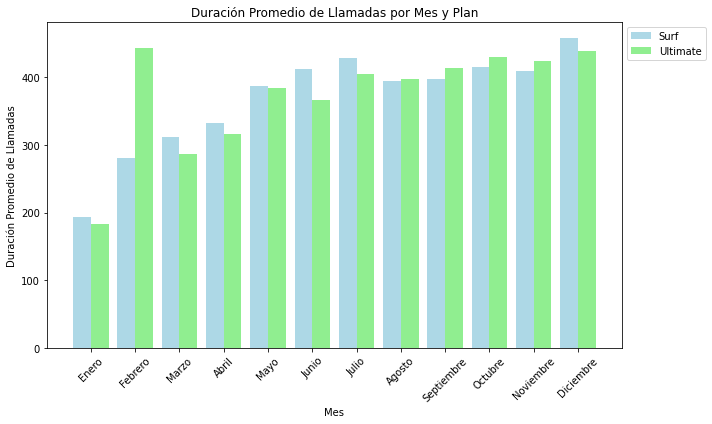

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_promedio_llamadas = merged_data.groupby(['plan', merged_data['month']])['minutos_utilizados'].mean().unstack()

# Configuracion de grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Eje x se separa por los meses del año y para cada mes se agrega la info correspondiente de ambos planes
for month in duracion_promedio_llamadas.columns:
    ax.bar(month - 0.2, duracion_promedio_llamadas.loc['surf', month], width=0.4, align='center', label='Surf', color='lightblue')
    ax.bar(month + 0.2, duracion_promedio_llamadas.loc['ultimate', month], width=0.4, align='center', label='Ultimate', color='lightgreen')

# Datos del grafico
ax.set_title('Duración Promedio de Llamadas por Mes y Plan')
ax.set_xlabel('Mes')
ax.set_ylabel('Duración Promedio de Llamadas')
ax.set_xticks(duracion_promedio_llamadas.columns)
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
ax.legend(['Surf', 'Ultimate'], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

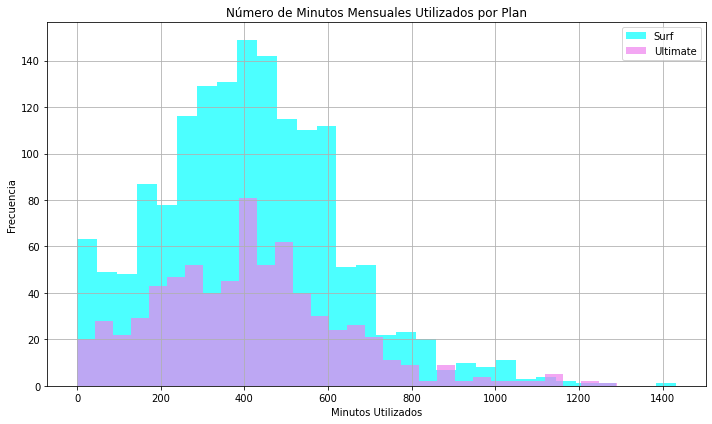

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Se filtra primero los datos de cada plan y los minutos utilizados
minutos_surf = merged_data.loc[merged_data['plan'] == 'surf', 'minutos_utilizados']
minutos_ultimate = merged_data.loc[merged_data['plan'] == 'ultimate', 'minutos_utilizados']

plt.figure(figsize=(10, 6))
# Se traza el histograma para los minutos utilizados por el plan Surf
plt.hist(minutos_surf, bins=30, alpha=0.7, label='Surf', color='aqua')

# Se traza el histograma para los minutos utilizados por el plan Ultimate
plt.hist(minutos_ultimate, bins=30, alpha=0.7, label='Ultimate', color='violet')

# Datos del grafico
plt.title('Número de Minutos Mensuales Utilizados por Plan')
plt.xlabel('Minutos Utilizados')
plt.ylabel('Frecuencia')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Duracion de total de llamadas por mes 
duracion_llamadas_por_mes = merged_data.groupby(merged_data['month'])['minutos_utilizados'].sum()

# Calcula la media de la duración mensual de llamadas
media_duracion_llamadas = duracion_llamadas_por_mes.mean()

# Calcula la varianza de la duración mensual de llamadas
varianza_duracion_llamadas = duracion_llamadas_por_mes.var()

print("Media de la duración mensual de llamadas:", media_duracion_llamadas)
print("Varianza de la duración mensual de llamadas:", varianza_duracion_llamadas)

Media de la duración mensual de llamadas: 77429.18833333334
Varianza de la duración mensual de llamadas: 4600227296.029725


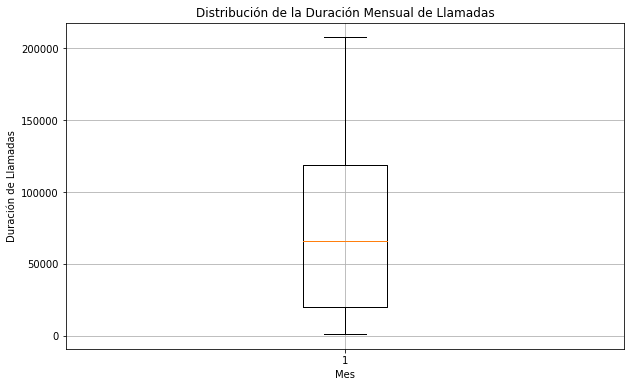

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Se agrupan los datos por mes y se extrae la duracion de la llamadas por mes
duracion_llamadas_por_mes = merged_data.groupby(merged_data['month'])['minutos_utilizados'].sum()

# Configuracion del diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(duracion_llamadas_por_mes.values)

plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas')
plt.grid(True)

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Con base en la información adquirida de los gráficos anteriores, el comportamiento de los usuarios con respecto a las llamadas sí varía en función del plan que manejan. Los usuarios del plan surf están utilizando más minutos en promedio que los del plan ultimate, esta información podría ser útil para revisar las características y limitaciones de cada plan para comprender la razón por la que los usuarios del plan surf podrían estar utilizando más minutos. 
Se podría ofrecer un número limitado de minutos pero a un precio más bajo, lo que podría motivar a los usuarios a hacer un uso más intensivo de las llamadas. Además de el diagrama de cajan puede ayudar a revelar si es que hay diferencias en la dispersión de los datos y la presencia de valores atípicos entre los usuarios de los diferentes planes.

### Mensajes

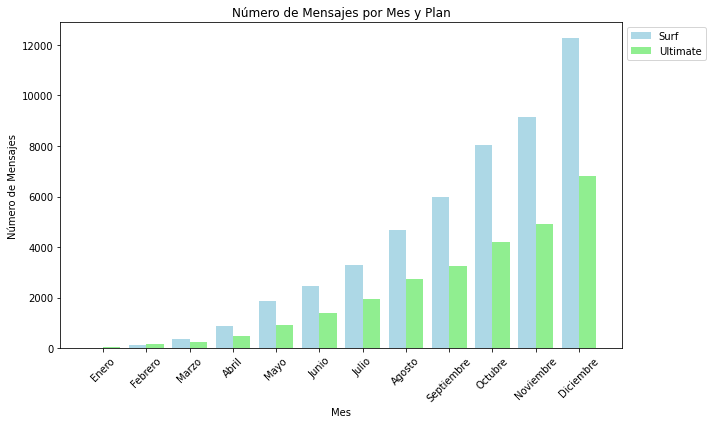

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_por_mes_y_plan = merged_data.groupby(['month', 'plan'])['numero_de_mensajes'].sum().unstack()

# Configuracion de grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Eje x se separa por los meses del año y para cada mes se agrega la info correspondiente de ambos planes
for month in mensajes_por_mes_y_plan.index:
    ax.bar(month - 0.2, mensajes_por_mes_y_plan.loc[month, 'surf'], width=0.4, align='center', label='Surf', color='lightblue')
    ax.bar(month + 0.2, mensajes_por_mes_y_plan.loc[month, 'ultimate'], width=0.4, align='center', label='Ultimate', color='lightgreen')

# Datos del grafico
ax.set_title('Número de Mensajes por Mes y Plan')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de Mensajes')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
ax.legend(['Surf', 'Ultimate'], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [36]:
# EXTRA: Calcula la media y la varianza del numero de mensajes mandados mensualmente
# Numero de mensajes total por mes 
numero_de_mensajes_por_mes = merged_data.groupby(merged_data['month'])['numero_de_mensajes'].sum()

# Calcula la media de los mensajes mandados
media_mensajes = numero_de_mensajes_por_mes.mean()

# Calcula la varianza de la duración mensual de llamadas
varianza_mensajes = numero_de_mensajes_por_mes.var()

print("Media de los mensajes mandados mensualmente:", media_mensajes)
print("Varianza de la duración mensual de llamadas:", varianza_mensajes)

Media de los mensajes mandados mensualmente: 6337.583333333333
Varianza de la duración mensual de llamadas: 38186593.53787879


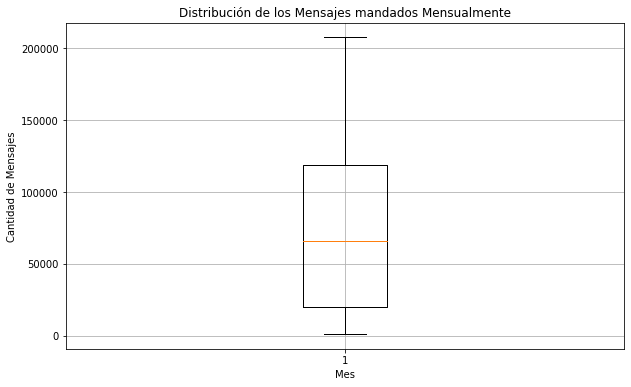

In [37]:
# EXTRA: Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes mandados mensualmente
# Se agrupan los datos por mes y se extrae la duracion de la llamadas por mes
numero_de_mensajes_por_mes = merged_data.groupby(merged_data['month'])['numero_de_mensajes'].sum()

# Configuracion del diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(duracion_llamadas_por_mes.values)

plt.title('Distribución de los Mensajes mandados Mensualmente')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Igualmente, como pasaba en el caso de las llamadas, se observa que hay mayor cantidad de mensajes enviados por parte de los usuarios que tienen el plan surf que los de ultimate a pesar de que el precio por mensaje es menor. Además de que la cantidad de mensajes es mucho mayor a finales del año suponiendo que hay mayor comunicación entre las personas por celebraciones navideñas y de año nuevo. Se pueden implementar estrategias con los clientes del plan ultimate para motivarlos a usar más este servicio de tal forma que la media incremente en el número de mensajes mandados. 

### Internet

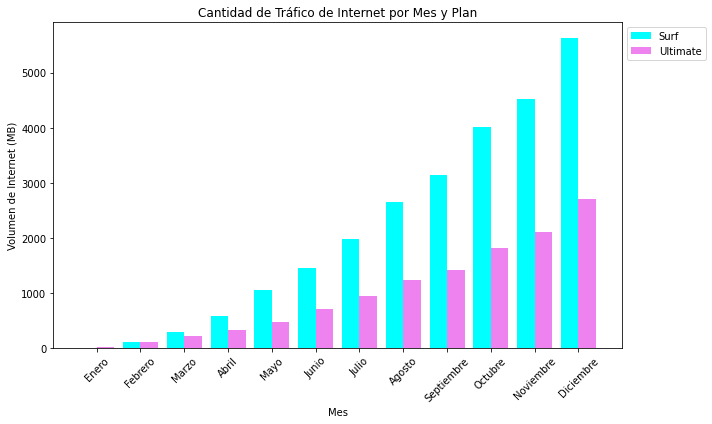

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafico_internet_por_mes_y_plan = merged_data.groupby(['month', 'plan'])['volumen_de_internet'].sum().unstack()

# Configuracion de grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Eje x se separa por los meses del año y para cada mes se agrega la info correspondiente de ambos planes
for month in trafico_internet_por_mes_y_plan.index:
    ax.bar(month - 0.2, trafico_internet_por_mes_y_plan.loc[month, 'surf'], width=0.4, align='center', label='Surf', color='aqua')
    ax.bar(month + 0.2, trafico_internet_por_mes_y_plan.loc[month, 'ultimate'], width=0.4, align='center', label='Ultimate', color='violet')

# Datos del grafico
ax.set_title('Cantidad de Tráfico de Internet por Mes y Plan')
ax.set_xlabel('Mes')
ax.set_ylabel('Volumen de Internet (MB)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
ax.legend(['Surf', 'Ultimate'], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [39]:
# EXTRA: Calcula la media y la varianza del la cantidad de tráfico de Internet mensual
trafico_internet_mensual = merged_data.groupby('month')['volumen_de_internet'].sum()

# Se calcula la media y la varianza del trafico de Internet mensual
media_trafico_mensual = trafico_internet_mensual.mean()
varianza_trafico_mensual = trafico_internet_mensual.var()

print("Media del tráfico de Internet mensual:", media_trafico_mensual)
print("Varianza del tráfico de Internet mensual:", varianza_trafico_mensual)

Media del tráfico de Internet mensual: 3128.31735921224
Varianza del tráfico de Internet mensual: 7508764.469331763


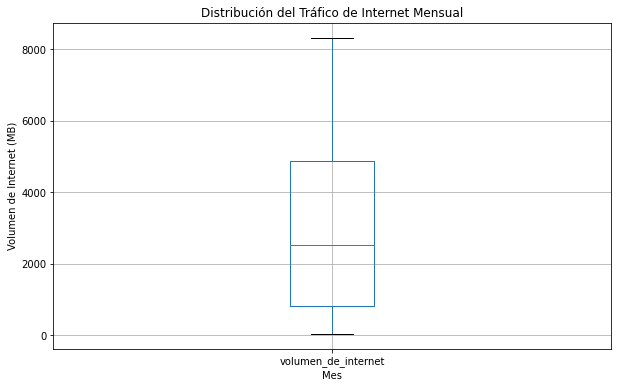

In [40]:
# EXTRA: Traza un diagrama de caja para visualizar el tráfico de Internet mensual
# Crear un diagrama de caja
plt.figure(figsize=(10, 6))
trafico_internet_mensual.plot(kind='box')
plt.title('Distribución del Tráfico de Internet Mensual')
plt.xlabel('Mes')
plt.ylabel('Volumen de Internet (MB)')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

De acuerdo con el diagrama de caja, el intervalo en el que se encuentra la media está entre los 2 a 4 a la 1e6 MB y observando lo que incluye el plan surf no es suficiente por lo que se puede hacer una modificación en este plan obviamente también incrementando el precio para llegar a este límite inferior y así los usuarios cuenten con mayor cantidad de MB para usar en Internet.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, es muy buena prática eliminar valores atipicos que puedan sesgar nuestros resultados. En este caso elaminar estos valores puedes ser útiles para tener una mejor respuesta de las pruebas de hipóstesis sobre si son iguales o diferentes los ingresos promedios de los usuarios de ambos planes y de los ingresos promedio de los usuarios del área NY-NJ.

</div>

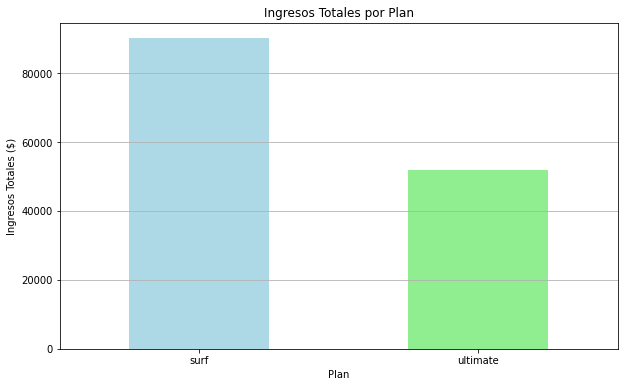

In [41]:
# Compara los ingresos que ha tenido cada plan 
ingresos_por_plan = merged_data.groupby('plan')['ingresos_mensuales'].sum()

# Grafico de barras para comparar los ingresos por plan
plt.figure(figsize=(10, 6))
ingresos_por_plan.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Ingresos Totales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [42]:
# Calcula la media y la varianza los ingresos mensuales
total_ingreso_mensual = merged_data.groupby('month')['ingresos_mensuales'].sum()

# Se calcula la media y la varianza del trafico de Internet mensual
media_ingreso_mensual = total_ingreso_mensual.mean()
varianza_ingreso_mensual = total_ingreso_mensual.var()

print("Media de los Ingresos Mensuales:", media_ingreso_mensual)
print("Varianza de los Ingresos Mensuales:", varianza_ingreso_mensual)

Media de los Ingresos Mensuales: 11837.224973502607
Varianza de los Ingresos Mensuales: 109007667.58193332


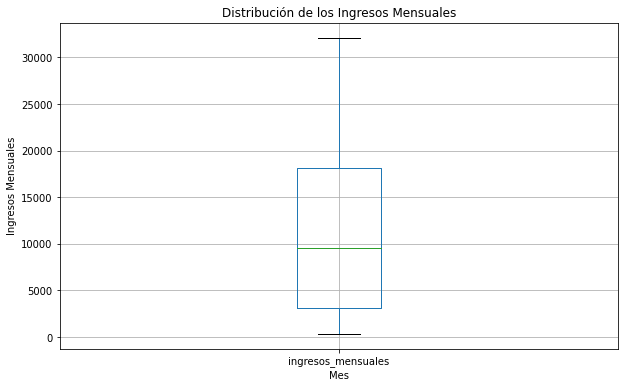

In [43]:
# Traza un diagrama de caja para visualizar el tráfico de Internet mensual
# Crear un diagrama de caja
plt.figure(figsize=(10, 6))
total_ingreso_mensual.plot(kind='box')
plt.title('Distribución de los Ingresos Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ingresos Mensuales')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Aunque haya más cantidad de usuarios en el plan surf, se puede observar que el plan que se tiene más ingresos es el ultimate. Con base en la información anterior, se podrían implementar estrategias para equiparar o inclusive superar los ingresos del plan ultimate con el surf proponiendo un rango de minutos más largo en las llamadas o precios más llamativos para los clientes ya que son la mayoría representada.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [44]:
# Prueba las hipótesis
# Nula (H0): Los ingresos promedio de los usuarios de los planes de llamada ultimate y surf son iguales
# Alternativa (H1): Los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

ingresos_surf = merged_data[merged_data['plan'] == 'surf']['ingresos_mensuales']
ingresos_ultimate = merged_data[merged_data['plan'] == 'ultimate']['ingresos_mensuales']

# Se realiza una prueba t de dos muestras independientes
results = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)  # Agregar equal_var=False
alfa = 0.05

print("Valor p:", results.pvalue)

# Comparar el valor p con el valor alfa
if results.pvalue < alfa:
    print("Rechazar la hipótesis nula: Hay una diferencia significativa en los ingresos promedio.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar una diferencia significativa en los ingresos promedio.")

Valor p: 4.881852673479799e-25
Rechazar la hipótesis nula: Hay una diferencia significativa en los ingresos promedio.



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [45]:
# Prueba las hipótesis
# Nula (H0): El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
# Alternativa (H1): El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

# Se fusionan los datos y se renombra la columna city a region
merged_data = pd.merge(merged_data, df_users[['user_id', 'city']], on='user_id', how='left')
merged_data.rename(columns={'city': 'region'}, inplace=True)

# Se limpian los datos (se eliminan las filas con regiones faltantes)
merged_data.dropna(subset=['region'], inplace=True)

# Eliminar filas duplicadas si es necesario
merged_data.drop_duplicates(inplace=True)

# Se obtienen los ingresos mensuales de los usuarios de la region de NY-NJ y de otras regiones
ingresos_nynj = merged_data[merged_data['region'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mensuales']
ingresos_otras_regiones = merged_data[merged_data['region'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mensuales']

# Se realiza la prueba t de dos muestras independientes
results = st.ttest_ind(ingresos_nynj, ingresos_otras_regiones, equal_var=False)

alfa = 0.05
print("Valor p:", results.pvalue)

if results.pvalue < alfa:
    print("Rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para afirmar una diferencia significativa en los ingresos promedio.")

Valor p: 0.01860947297497195
Rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo verificar esta segunda prueba de hipótesis. Este resultado puede cambiar cuando hagamos los ajustes que te comento a lo largo del código. 
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [46]:
#Durante el proceso de análisis entre los dos tipos de planes que ocupaban los usuarios, se observo que la tendencia es en utilizar el plan surf ya que cuenta con las características suficientes y económicas para satisfacer sus necesidades. Lo que se podría hacer en ambos planes es implementar cambios especialmente en la parte de los precios y MB para que sea más atractivo y aumentar los ingresos mensuales de ambos planes. 

In [ ]:
<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos  
    
*  verificar que redondeamos las variables antes de hacer la agrupación por usuario
    
*  verificar la segunda prueba de hipótesis
</div>